<a href="https://colab.research.google.com/github/ahaboud1/ahaboud1/blob/master/Binary_Classification_Model_Template_202008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification Models
- Author: Amy Zhuang
- Date: August 2020

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, log_loss

## Readin Data

In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [ ]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target']=data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

## Standardization

In [ ]:
X_features = df[df.columns.difference(['target'])]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X_features),index=X_features.index,columns=X_features.columns)
# Note: For the datasets with outliers, standardize using Robust Scaler

In [ ]:
X.describe()

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,mean perimeter,mean radius,mean smoothness,mean symmetry,mean texture,perimeter error,radius error,smoothness error,symmetry error,texture error,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-8.291551e-16,-3.921877e-16,-2.739461e-16,7.917900e-16,-3.366766e-16,-8.799835e-16,-1.120369e-15,9.732500e-16,-4.421380e-16,-1.453631e-15,-7.078891e-16,-3.162867e-15,6.132177e-15,-1.971670e-15,-6.530609e-15,1.773674e-15,-9.076415e-16,-7.541809e-16,-3.108234e-16,-8.853492e-16,5.049661e-16,-2.174788e-15,-1.412656e-16,6.856456e-16,2.575171e-15,-1.198026e-15,-2.333224e-15,-5.213170e-15,-2.289567e-15,1.763674e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-7.378291e-01,-1.298098e+00,-1.913447e+00,-1.057501e+00,-1.096968e+00,-1.454443e+00,-1.610136e+00,-1.261820e+00,-1.114873e+00,-1.819865e+00,-1.984504e+00,-2.029648e+00,-3.112085e+00,-2.744117e+00,-2.229249e+00,-1.044049e+00,-1.059924e+00,-1.776065e+00,-1.532890e+00,-1.554264e+00,-1.222423e+00,-1.443878e+00,-1.745063e+00,-1.305831e+00,-1.601839e+00,-1.693361e+00,-1.726901e+00,-2.682695e+00,-2.160960e+00,-2.223994e+00
25%,-4.947542e-01,-6.929263e-01,-6.744900e-01,-5.571612e-01,-5.851185e-01,-6.671955e-01,-7.470860e-01,-7.379438e-01,-7.437479e-01,-7.226392e-01,-6.919555e-01,-6.893853e-01,-7.109628e-01,-7.032397e-01,-7.259631e-01,-6.237679e-01,-6.235706e-01,-6.240183e-01,-6.516807e-01,-6.948092e-01,-6.421359e-01,-6.810833e-01,-7.563999e-01,-7.565142e-01,-6.919118e-01,-6.895783e-01,-6.749213e-01,-6.912304e-01,-6.418637e-01,-7.486293e-01
50%,-3.477828e-01,-2.810204e-01,-1.404958e-01,-1.990654e-01,-2.299405e-01,-2.951869e-01,-2.219405e-01,-3.977212e-01,-3.422399e-01,-1.782793e-01,-2.359800e-01,-2.150816e-01,-3.489108e-02,-7.162650e-02,-1.046362e-01,-2.866520e-01,-2.922452e-01,-2.203352e-01,-2.194304e-01,-1.974976e-01,-3.411812e-01,-2.695009e-01,-2.234689e-01,-2.182321e-01,-2.164441e-01,-2.859802e-01,-2.690395e-01,-4.684277e-02,-1.274095e-01,-4.351564e-02
75%,1.067726e-01,3.896541e-01,4.726567e-01,3.367521e-01,2.886421e-01,3.635073e-01,4.938569e-01,6.469351e-01,5.260619e-01,4.709834e-01,4.996769e-01,4.693926e-01,6.361990e-01,5.307792e-01,5.841756e-01,2.430307e-01,2.660996e-01,3.683553e-01,3.556925e-01,4.665523e-01,3.575891e-01,5.396688e-01,7.125100e-01,5.311411e-01,4.507624e-01,5.402790e-01,5.220158e-01,5.975448e-01,4.501382e-01,6.583411e-01
max,1.104184e+01,6.143482e+00,6.649601e+00,1.207268e+01,9.851593e+00,5.250529e+00,4.568425e+00,3.927930e+00,4.243589e+00,4.910919e+00,3.976130e+00,3.971288e+00,4.770911e+00,4.484751e+00,4.651889e+00,9.461986e+00,8.906909e+00,8.029999e+00,7.071917e+00,6.655279e+00,5.930172e+00,5.112877e+00,2.685877e+00,4.700669e+00,6.846856e+00,4.287337e+00,4.094189e+00,3.955374e+00,6.046041e+00,3.885905e+00


## Train Test Split

In [ ]:
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

## Logistic Regression

In [ ]:
# Check default values
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic = LogisticRegression(penalty='none', random_state=0).fit(X_train, y_train)
# penalty='none' means no regularization is applied
# C is the inverse of the regularization strength, so smaller number indicates stronger regularization.

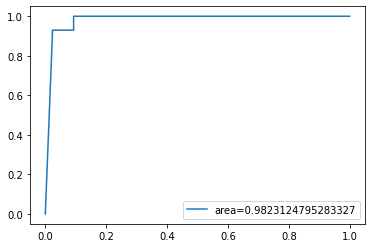

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=logistic.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, logistic.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        5        66


In [ ]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
log_loss(y_test,y_test_prob)

1.8278698068697519

In [ ]:
LogisticCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)
LogisticCoeff.columns=['Variable','Coefficient']
LogisticCoeff['Coefficient_Abs']=LogisticCoeff['Coefficient'].apply(abs)
LogisticCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
6,mean compactness,655.022921,655.022921
7,mean concave points,-614.851507,614.851507
16,radius error,-587.366254,587.366254
23,worst concavity,-553.175908,553.175908
3,concavity error,535.170188,535.170188
0,area error,-387.789294,387.789294
28,worst symmetry,-386.004515,386.004515
9,mean fractal dimension,-384.092942,384.092942
8,mean concavity,-319.132275,319.132275
15,perimeter error,276.486058,276.486058


To learn more about the interpretation of the logistic regression coefficient, check out his article: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

## Ridge

In [ ]:
ridge = LogisticRegression(penalty='l2', random_state=0).fit(X_train, y_train)
# penalty='l2' means Ridge regularization is applied

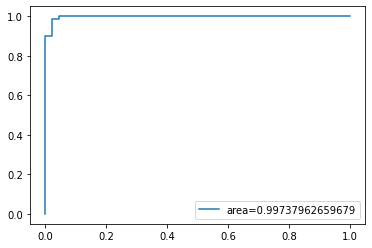

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=ridge.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.06011307379700578

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ridge.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        1        70


In [ ]:
print(classification_report(y_test, ridge.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
ridgeCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
ridgeCoeff.columns=['Variable','Coefficient']
ridgeCoeff['Coefficient_Abs']=ridgeCoeff['Coefficient'].apply(abs)
ridgeCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
29,worst texture,-1.353079,1.353079
16,radius error,-1.253200,1.253200
28,worst symmetry,-1.198184,1.198184
7,mean concave points,-1.106465,1.106465
23,worst concavity,-0.952964,0.952964
0,area error,-0.921905,0.921905
26,worst radius,-0.873394,0.873394
20,worst area,-0.842182,0.842182
8,mean concavity,-0.803748,0.803748
22,worst concave points,-0.778874,0.778874


## LASSO

In [ ]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=0).fit(X_train, y_train)
# penalty='l1' means LASSO regularization is applied
# solver is an algorithm to use in the optimization problem.
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
# ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
# ‘liblinear’ and ‘saga’ also handle L1 penalty
# ‘saga’ also supports ‘elasticnet’ penalty
# ‘liblinear’ does not support setting penalty='none'

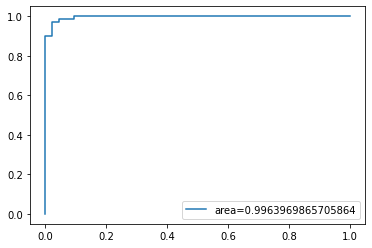

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=lasso.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.0688232967968902

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, lasso.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        42         1
true:yes        2        69


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ridge.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

In [ ]:
print(classification_report(y_test, lasso.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
lassoCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
lassoCoeff.columns=['Variable','Coefficient']
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
16,radius error,-2.434460,2.434460
7,mean concave points,-2.383121,2.383121
20,worst area,-2.254291,2.254291
29,worst texture,-1.866220,1.866220
26,worst radius,-1.485869,1.485869
23,worst concavity,-1.299211,1.299211
28,worst symmetry,-1.019279,1.019279
1,compactness error,0.836973,0.836973
18,symmetry error,0.463489,0.463489
17,smoothness error,-0.439798,0.439798


## Elastic Net

In [ ]:
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=0).fit(X_train, y_train)
# solver is an algorithm to use in the optimization problem.
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
# ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
# ‘liblinear’ and ‘saga’ also handle L1 penalty
# ‘saga’ also supports ‘elasticnet’ penalty
# ‘liblinear’ does not support setting penalty='none'

# l1_ratio: The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'`. Setting ``l1_ratio=0 is equivalent to 
# using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


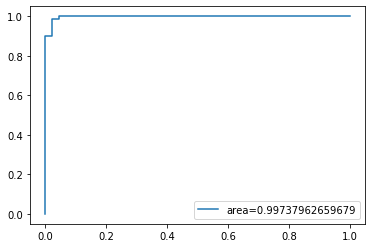

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=elasticNet.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.059659363767287636

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, elasticNet.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        42         1
true:yes        1        70


In [ ]:
print(classification_report(y_test, elasticNet.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
elasticNetCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(elasticNet.coef_))], axis = 1)
elasticNetCoeff.columns=['Variable','Coefficient']
elasticNetCoeff['Coefficient_Abs']=elasticNetCoeff['Coefficient'].apply(abs)
elasticNetCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
29,worst texture,-1.102539,1.102539
16,radius error,-1.020939,1.020939
28,worst symmetry,-0.937847,0.937847
7,mean concave points,-0.840223,0.840223
26,worst radius,-0.832168,0.832168
22,worst concave points,-0.805606,0.805606
23,worst concavity,-0.789594,0.789594
20,worst area,-0.777016,0.777016
0,area error,-0.719655,0.719655
27,worst smoothness,-0.688962,0.688962


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier().fit(X_train, y_train)

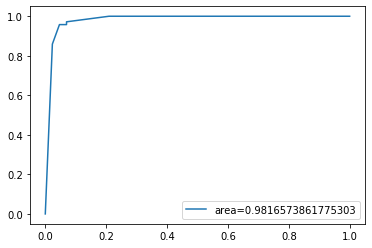

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.3868538364954062

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, knn.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        3        68


In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV # LinearSVC does not provide predict_proba, this will scikit-learn provides CalibratedClassifierCV which can be used to solve this problem: it allows to add probability output to LinearSVC or any other classifier which implements decision_function method

In [ ]:
 svm = LinearSVC(random_state = 42)
 svm.fit(X_train, y_train)
 clf = CalibratedClassifierCV(svm) 
 clf.fit(X_train, y_train)
 y_proba = clf.predict_proba(X_test)

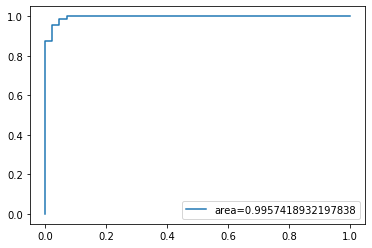

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.11172695854794033

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:yes', 'true:no'], columns=['pred:yes', 'pred:no'])
print(cmtx)

          pred:yes  pred:no
true:yes        40        3
true:no          0       71


In [ ]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
svmCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(svm.coef_))], axis = 1)
svmCoeff.columns=['Variable','Coefficient']
svmCoeff['Coefficient_Abs']=svmCoeff['Coefficient'].apply(abs)
svmCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
7,mean concave points,-1.292714,1.292714
16,radius error,-1.085787,1.085787
6,mean compactness,0.924964,0.924964
23,worst concavity,-0.844693,0.844693
29,worst texture,-0.785718,0.785718
28,worst symmetry,-0.780571,0.780571
0,area error,-0.757177,0.757177
20,worst area,-0.740594,0.740594
26,worst radius,-0.687682,0.687682
3,concavity error,0.595542,0.595542


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier(random_state=0)
treeClf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

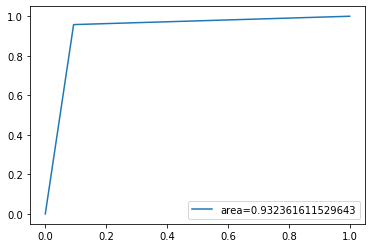

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=treeClf.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

2.120830115386804

In [ ]:
cm = confusion_matrix(y_test, treeClf.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        39         4
true:yes        3        68


In [ ]:
print(classification_report(y_test, treeClf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
treeCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(treeClf.feature_importances_))], axis = 1)
treeCoeff.columns=['Variable','Feature_Importance']
treeCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
7,mean concave points,0.691420
22,worst concave points,0.073720
29,worst texture,0.067854
26,worst radius,0.052299
25,worst perimeter,0.051494
4,fractal dimension error,0.018554
2,concave points error,0.015931
0,area error,0.011983
27,worst smoothness,0.009233
6,mean compactness,0.006276


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

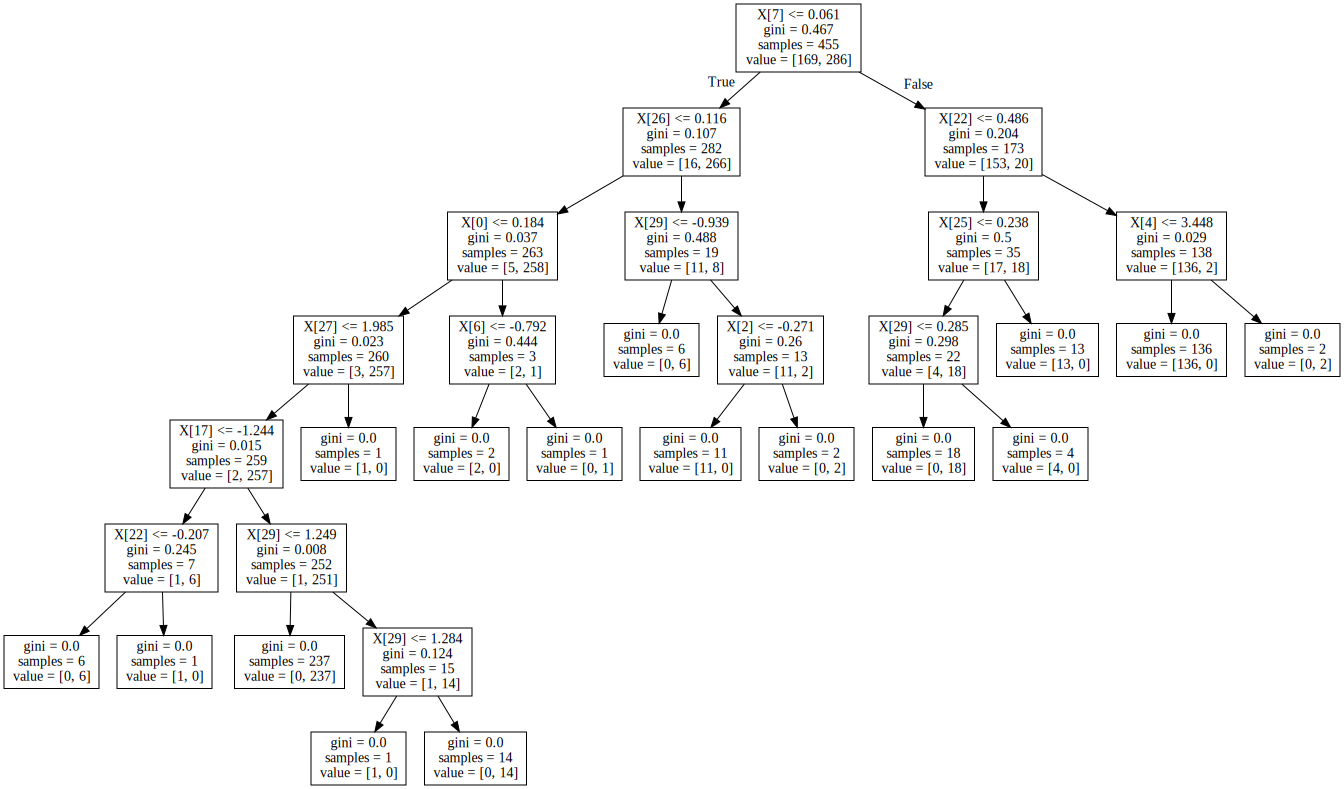

In [ ]:
export_graphviz(treeClf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1).fit(X_train,y_train)

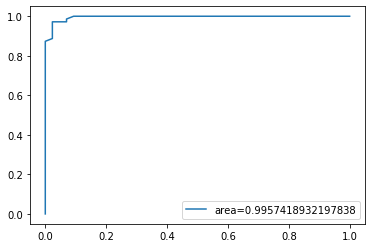

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.09530366381553619

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        1        70


In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
rfCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf.feature_importances_))], axis = 1)
rfCoeff.columns=['Variable','Feature_Importance']
rfCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
22,worst concave points,0.132792
7,mean concave points,0.130294
20,worst area,0.107588
26,worst radius,0.101616
25,worst perimeter,0.101142
10,mean perimeter,0.066317
5,mean area,0.048780
8,mean concavity,0.036679
23,worst concavity,0.032749
0,area error,0.030068


To see how the feature importance are calculated, check out this: https://www.displayr.com/how-is-variable-importance-calculated-for-a-random-forest/
and this is: https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

## Extra Tree

Extra Tree is also called Extreme Randomized Trees. Comparing to Random Forest


1.   When choosing variables at a split, samples are drawn from the entire training set instead of a bootstrap sample of the training set.
2.   Splits are chosen completely at random from the range of values in the sample at each split.



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
et = ExtraTreesClassifier(n_estimators=200, random_state=0, n_jobs=-1).fit(X_train,y_train)

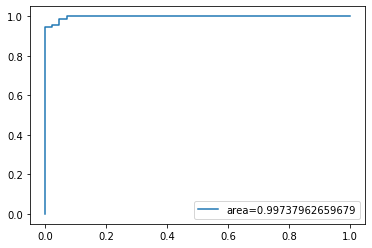

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=et.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.08844002670869902

In [ ]:
cm = confusion_matrix(y_test, et.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        1        70


In [ ]:
print(classification_report(y_test, et.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
etCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(et.feature_importances_))], axis = 1)
etCoeff.columns=['Variable','Feature_Importance']
etCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
22,worst concave points,0.106496
26,worst radius,0.096859
25,worst perimeter,0.090883
7,mean concave points,0.081943
20,worst area,0.076494
11,mean radius,0.061440
10,mean perimeter,0.056507
5,mean area,0.045632
8,mean concavity,0.043292
23,worst concavity,0.040792


## Gradient Boosting Machine (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, random_state=42).fit(X_train,y_train)

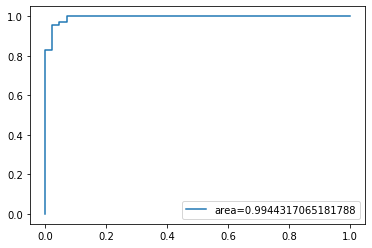

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=gb.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.14101327847160175

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        1        70


In [ ]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
gbCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(gb.feature_importances_))], axis = 1)
gbCoeff.columns=['Variable','Feature_Importance']
gbCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
7,mean concave points,0.449199
22,worst concave points,0.240309
26,worst radius,0.075687
29,worst texture,0.052612
25,worst perimeter,0.051188
20,worst area,0.037637
23,worst concavity,0.018290
3,concavity error,0.015707
14,mean texture,0.015107
0,area error,0.009677


## XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train, y_train)

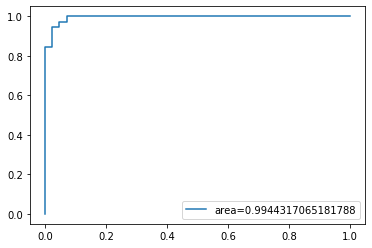

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=xgb.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.09738804364123528

In [ ]:
cm = confusion_matrix(y_test, xgb.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        2        69


In [ ]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
xgbCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb.feature_importances_))], axis = 1)
xgbCoeff.columns=['Variable','Feature_Importance']
xgbCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
7,mean concave points,0.331756
22,worst concave points,0.222752
25,worst perimeter,0.098498
26,worst radius,0.074222
20,worst area,0.031044
29,worst texture,0.024402
14,mean texture,0.023178
23,worst concavity,0.021696
3,concavity error,0.018174
15,perimeter error,0.016355


Xgboost vs. GBM


*   Regularization
*   Paralell computing
*   Handles missing values
*   Second-order gradients (partial derivative of the loss function) provides more information for the directions of the gradient



## Naive Beyes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

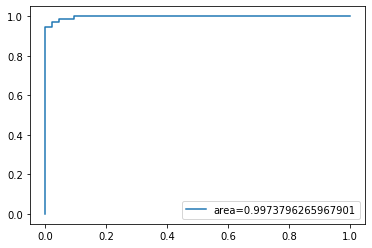

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=nb.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.20510070595645047

In [ ]:
cm = confusion_matrix(y_test, nb.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        1        70


In [ ]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Neural Network Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create model
nn_model=Sequential()
nn_model.add(Dense(15,input_dim=30,activation='relu'))

nn_model.add(Dense(1,activation='sigmoid'))

#Compile model
nn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Fit the model
nn_model.fit(X_train,y_train, epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7582
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7934
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8132
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8418
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8637
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8901
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.9055
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3002 - accuracy: 0.9165
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9231
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.9297
Epoch 11/50
5/5 [======================

Instructions for updating:
Please use `model.predict()` instead.


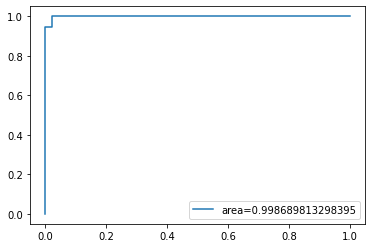

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=nn_model.predict_proba(X_test)
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, nn_model.predict_classes(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
          pred:no  pred:yes
true:no        42         1
true:yes        0        71


In [ ]:
print(classification_report(y_test, nn_model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
log_loss(y_test,nn_model.predict_proba(X_test))

0.08034928883013667